# 1. Exploratory Data Analysis

***

This notebooks contains the user defined function scripts and sample scripts regarding the data analysis done over the proposed datasets as part of  fake news automatic detection

### 1.1 Word Count Analysis

This script is using to visualise the distribution of top words from the text corpus based on the frequency of occurence of the words


**Sample Script and a Output**

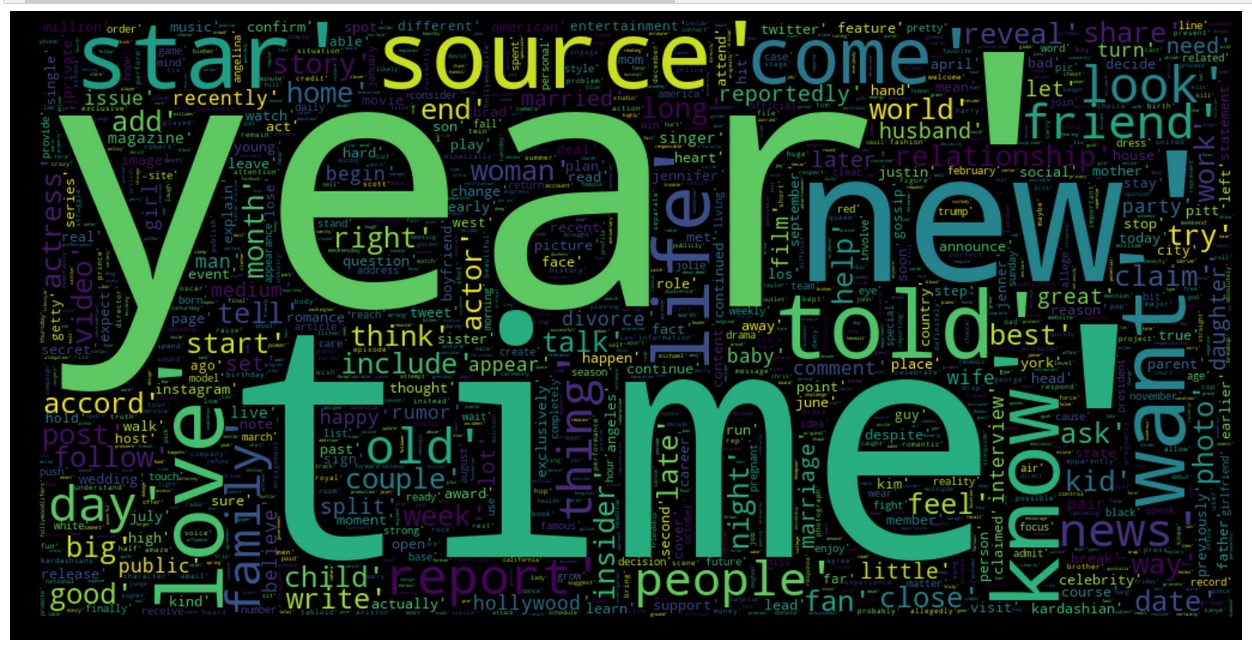

***
### 1.2 Script to find the frequency Count Distribution of the words 

This below function script is using to find the frequency Count Distribution of the words to identify the list of words which occurring more frequently in both real and fake classes.


In [ ]:
def frequency_words(words, classnm):
    counter = Counter(chain.from_iterable(words))
    df_freq_word = pd.DataFrame(counter.values(), index = counter.keys(), columns = ['Word_Frequency'])
    df_freq_word.index = df_freq_word.index.set_names(classnm)
    df_freq_word = df_freq_word.sort_values(by = 'Word_Frequency', ascending = False, axis=0)[:30]
    df_freq_word = df_freq_word.pivot_table(columns = classnm)
    df_freq_word = df_freq_word.sort_values(by = 'Word_Frequency', ascending = False, axis=1)
    display(df_freq_word)
    
frequency_words(words_real, 'Fake')

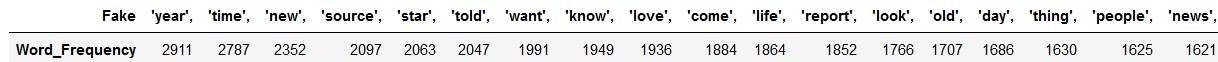

***
### 1.3 Script to visualise the count of Words in each row of news text

This below script is using to visualise the count of Words in each row of news text to get the list of common words available in each class


In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,5))
text_len=df3[df3['class']==1]['cleaned_fulltext'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='forestgreen')
ax1.set_title('Fake news text')
text_len=df3[df3['class']==0]['cleaned_fulltext'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='coral')
ax2.set_title('Real news text')
fig.suptitle('Words in texts')
plt.show()

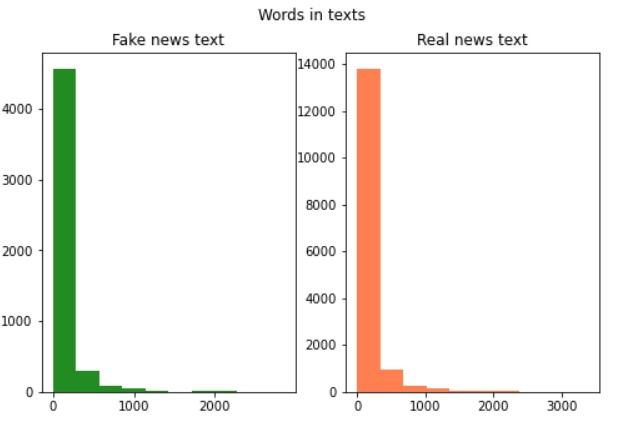

***
### 1.4 Script to analyse n-gram basis of text content

This below script is using to analysis the count of words based on ngram analysis for both fake and real class categories

In [ ]:
def plot_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

## Unigram analysis

plot_n_gram(real_string,1)

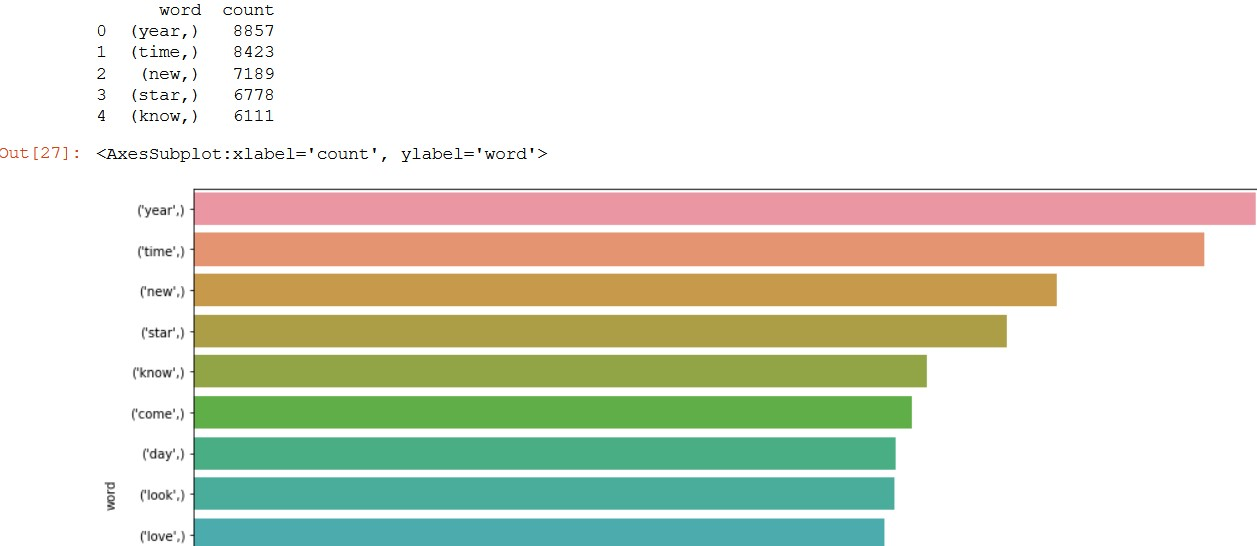

In [ ]:
##### Trigram Analysis

plot_n_gram(real_string,3)

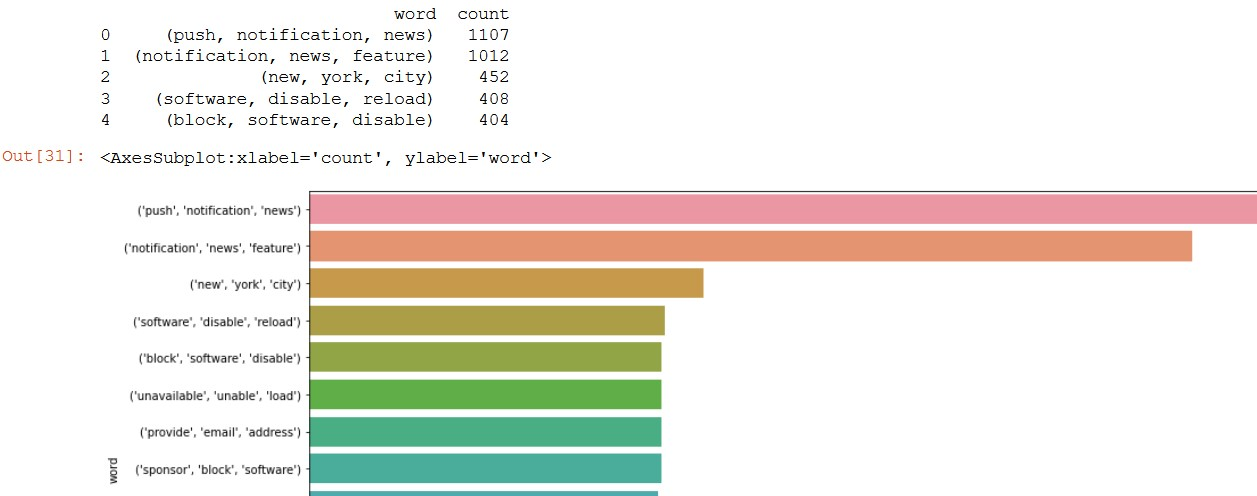

***
### 1.5 Script to Identify truth percentage probability for each domain or subject

This below script is the sample script using to Identify truth percentage probability for each domain or subject

**Sample Script**

In [ ]:
df_truth = pd.pivot_table(df3,index='domain',columns='class',fill_value=0,aggfunc={'domain':'count'})
df_truth['%truth'] = df_truth.apply(lambda row: row[0]/(row[0]+row[1]),axis=1)
df_truth[(df_truth['%truth']!=0)&(df_truth['%truth']!=1)].sort_values(by='%truth',ascending=False)

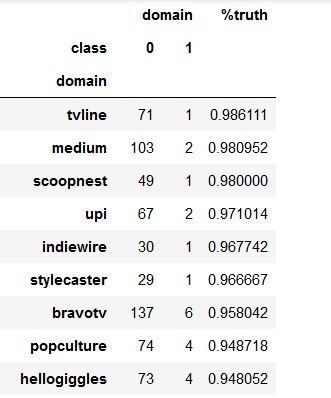

***
### 1.6 Script to visualise the count of real and fake news count from websites

This below script is the sample script using to visualise the count of real and fake news count from websites

**Sample Script Example**

In [ ]:
real_order=df2[df2['class']==0]['url_filter'].value_counts().sort_values(ascending=False).index
df_real=df2.pivot_table(index = 'domain', columns = 'class', values = 'url', aggfunc='count').fillna(0).astype(int).sort_values(0,axis=0,ascending=False).head(15)
df_fake[1].plot(kind='bar')

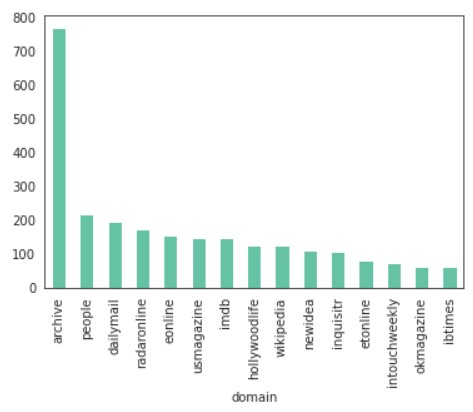

***
### 1.7 Script to visualise the title length distribution for both fake and real news articles

This below script is the sample script using to visualise the count of real and fake news count from websites

**Sample Script Example**

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(df2[df2['class']==0]['title_length'])
sns.kdeplot(df2[df2['class']==1]['title_length'])
plt.xlabel('Title Length',fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.legend(title='News Type',fontsize=10,labels=['Real','Fake'])
plt.title('Distribution of Title Length for Real and Fake News',fontsize=15)
plt.show()

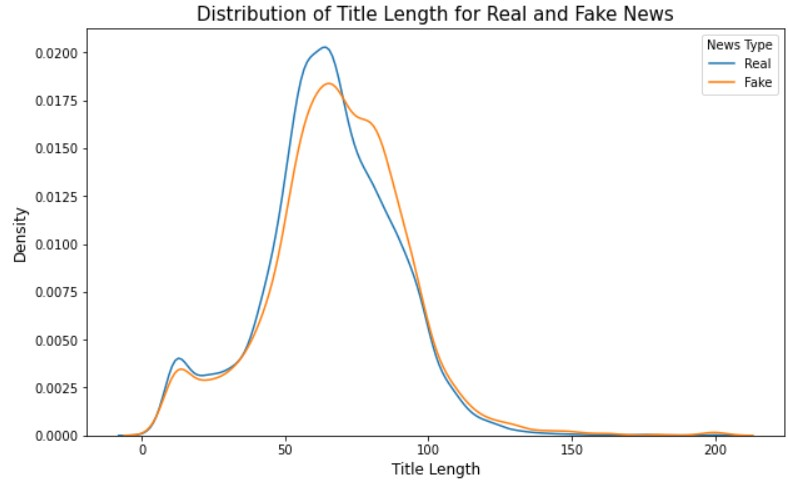

**Script to find the News body length distribution for both class**

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(df2[df2['class']==0]['body_length'])
sns.kdeplot(df2[df2['class']==1]['body_length'])
plt.xlabel('Title Length',fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.legend(title='News Type',fontsize=10,labels=['Real','Fake'])
plt.title('Distribution of News Body Length for Real and Fake News',fontsize=15)
plt.show()

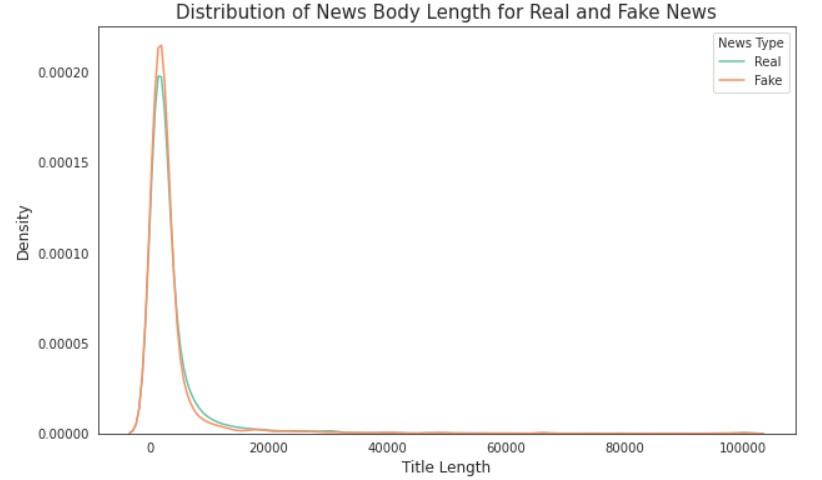